In [1]:
import geopandas as gpd
from pyproj import transform,Proj
from shapely.geometry import MultiPoint, Point

import pandas as pd
import numpy as np

import os
import gc
import warnings

from tqdm import trange,tqdm

warnings.filterwarnings('ignore')

import glob
from PIL import Image

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

%matplotlib inline

os.chdir("../../")
root_path = os.getcwd()

raw_file_path = os.path.join(root_path, "Bigcon2020_raw_file")
csv_file_path = os.path.join(root_path, "BigCon_2020/csv_files")
pickle_file_path = os.path.join(root_path, "BigCon_2020/pickle_files")

image_path = 'C:/Users/rears/OneDrive/바탕 화면/dacon_covid19/'

In [99]:
from itertools import combinations, permutations

In [2]:
raw_file_folders = os.listdir(raw_file_path)
geo_df=gpd.read_file(os.path.join(raw_file_path,raw_file_folders[0],'4개지역_행정동.SHP'))

In [3]:
bus_info=os.path.join(csv_file_path,'bus_info')

bus_station_info=[pd.read_excel(os.path.join(bus_info,file)) for file in os.listdir(bus_info) if file.endswith('xlsx')][0]

bus_route=[pd.read_csv(os.path.join(bus_info,file), encoding='cp949') for file in os.listdir(bus_info) if file.endswith('csv')]

bus_route[4] = bus_route[4].drop('bus_route_id', axis=1)
bus_route[5] = bus_route[5].drop('bus_route_id', axis=1)
bus_route[6] = bus_route[6].drop('bus_route_id', axis=1)

bus_route[4].columns = bus_route[0].columns
bus_route[5].columns = bus_route[0].columns
bus_route[6].columns = bus_route[0].columns

bus_route = pd.concat(bus_route)

In [4]:
bus_station_info['point'] = None

In [5]:
bus_station_info.head(10)

,표준ID,ARS-ID,정류장명,X좌표,Y좌표,비고,point
0,100000001,1001,종로2가사거리,126.987750,37.569765,NaN,None
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183,NaN,None
2,100000003,1003,명륜3가.성대입구,126.998340,37.582671,NaN,None
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,NaN,None
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,NaN,None
5,101000305,1006,서대문역사거리,126.966893,37.566137,NaN,None
6,100000380,1007,서울역사박물관.경희궁앞,126.970380,37.569135,NaN,None
7,100000379,1008,서울역사박물관.경희궁앞,126.970609,37.569412,NaN,None
8,100000384,1009,광화문,126.975251,37.570135,NaN,None
9,100000385,1010,광화문,126.978085,37.570217,NaN,None


In [6]:
subway_path=os.path.join(csv_file_path,'subway')

In [7]:
subway_station = gpd.read_file(os.path.join(subway_path,'substation_pt_sma_170923.shp'))

In [8]:
proj_UTMK = Proj(init='epsg:5178')
proj_WGS84 = Proj(init='epsg:4326')

In [9]:
for i in trange(bus_station_info.shape[0]):
    x=bus_station_info.iloc[i,:].X좌표
    y=bus_station_info.iloc[i,:].Y좌표
    
    bus_station_info.iloc[i,-1]=Point(transform(proj_WGS84,proj_UTMK,x,y))

100%|████████████████████████████████████████████████████████████████████████████| 11280/11280 [09:31<00:00, 19.72it/s]


In [10]:
bus_station_info.head(10)

,표준ID,ARS-ID,정류장명,X좌표,Y좌표,비고,point
0,100000001,1001,종로2가사거리,126.987750,37.569765,NaN,POINT (954953.4472414826 1952083.487207221)
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183,NaN,POINT (955737.5763993721 1953124.169037486)
2,100000003,1003,명륜3가.성대입구,126.998340,37.582671,NaN,POINT (955896.2869434773 1953510.331291817)
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,NaN,POINT (954940.6524992425 1951951.987410024)
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,NaN,POINT (956198.9272839265 1953905.016739041)
5,101000305,1006,서대문역사거리,126.966893,37.566137,NaN,POINT (953109.3102266531 1951691.178555617)
6,100000380,1007,서울역사박물관.경희궁앞,126.970380,37.569135,NaN,POINT (953419.1299199655 1952022.058152919)
7,100000379,1008,서울역사박물관.경희궁앞,126.970609,37.569412,NaN,POINT (953439.5256339005 1952052.67656241)
8,100000384,1009,광화문,126.975251,37.570135,NaN,POINT (953849.8851075849 1952130.650060812)
9,100000385,1010,광화문,126.978085,37.570217,NaN,POINT (954100.2678766714 1952138.283184346)


In [11]:
subway_station.head(10)

,전철역,전철역_,호선,외부코,사이버,X좌표,Y좌표,X,Y,geometry
0,None,None,7,None,None,515365,1121815,127.070230,37.540693,POINT (127.07023 37.54069)
1,None,None,2,None,None,515365,1121815,127.070230,37.540693,POINT (127.07023 37.54069)
2,None,None,2,None,None,518867,1120790,127.085916,37.537077,POINT (127.08592 37.53708)
3,None,None,2,None,None,520755,1120262,127.094681,37.535095,POINT (127.09468 37.53509)
4,None,None,2,None,None,522630,1116225,127.103790,37.520733,POINT (127.10379 37.52073)
5,None,None,8,None,None,522390,1114282,127.102234,37.513950,POINT (127.10223 37.51395)
6,None,None,2,None,None,522390,1114282,127.102234,37.513950,POINT (127.10223 37.51395)
7,None,None,2,None,None,518955,1113730,127.086162,37.511687,POINT (127.08616 37.51169)
8,None,None,2,None,None,516222,1113652,127.073642,37.510997,POINT (127.07364 37.51100)
9,None,None,9,None,None,516222,1113652,127.073642,37.510997,POINT (127.07364 37.51100)


In [12]:
for i in trange(subway_station.shape[0]):
    x = subway_station.iloc[i,:].X
    y = subway_station.iloc[i,:].Y
    
    subway_station.iloc[i,-1]=Point(transform(proj_WGS84,proj_UTMK,x,y))

100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [00:35<00:00, 19.68it/s]


In [13]:
subway_station.head(10)

,전철역,전철역_,호선,외부코,사이버,X좌표,Y좌표,X,Y,geometry
0,None,None,7,None,None,515365,1121815,127.070230,37.540693,POINT (962222.506 1948821.668)
1,None,None,2,None,None,515365,1121815,127.070230,37.540693,POINT (962222.506 1948821.668)
2,None,None,2,None,None,518867,1120790,127.085916,37.537077,POINT (963606.501 1948414.293)
3,None,None,2,None,None,520755,1120262,127.094681,37.535095,POINT (964379.923 1948191.038)
4,None,None,2,None,None,522630,1116225,127.103790,37.520733,POINT (965178.015 1946594.232)
5,None,None,8,None,None,522390,1114282,127.102234,37.513950,POINT (965037.345 1945842.273)
6,None,None,2,None,None,522390,1114282,127.102234,37.513950,POINT (965037.345 1945842.273)
7,None,None,2,None,None,518955,1113730,127.086162,37.511687,POINT (963615.883 1945597.311)
8,None,None,2,None,None,516222,1113652,127.073642,37.510997,POINT (962509.050 1945525.683)
9,None,None,9,None,None,516222,1113652,127.073642,37.510997,POINT (962509.050 1945525.683)


In [ ]:
# x=geo_df.geometry.apply(lambda x: MultiPoint(list(x.exterior.coords)))[0][0].x
# y=geo_df.geometry.apply(lambda x: MultiPoint(list(x.exterior.coords)))[0][0].y

In [14]:
bus_station_indices=[]

for i in trange(bus_station_info.shape[0]):
    if sum(geo_df.geometry.contains(bus_station_info.point[i]))==1:
        bus_station_indices.append(i)

100%|██████████████████████████████████████████████████████████████████████████| 11280/11280 [00:03<00:00, 3755.42it/s]


In [15]:
bus_station_HDONG_NM = {}

for i in tqdm(bus_station_indices):
    bus_station_HDONG_NM[i] = geo_df.iloc[pd.Series(geo_df.geometry.contains(bus_station_info.point[i])+0).idxmax(),2]

100%|██████████████████████████████████████████████████████████████████████████████| 819/819 [00:00<00:00, 1653.38it/s]


In [16]:
subway_station_indices=[]

for i in trange(subway_station.shape[0]):
    if sum(geo_df.geometry.contains(subway_station.geometry[i]))==1:
        subway_station_indices.append(i)

100%|██████████████████████████████████████████████████████████████████████████████| 695/695 [00:00<00:00, 3701.48it/s]


In [17]:
subway_station=gpd.GeoDataFrame(subway_station.iloc[subway_station_indices], geometry=gpd.points_from_xy(subway_station.iloc[subway_station_indices].geometry.x, subway_station.iloc[subway_station_indices].geometry.y)).reset_index(drop=True)

In [18]:
subway_station_HDONG_NM = {}

for i in trange(subway_station.shape[0]):
    subway_station_HDONG_NM[i] = geo_df.iloc[pd.Series(geo_df.geometry.contains(subway_station.geometry[i])+0).idxmax(),2]

100%|████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 1314.46it/s]


In [19]:
from collections import Counter

In [450]:
# bus_station_HDONG_NM

#### 행정동별 버스정류장 개수 

In [21]:
bus_route.sample(10)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
647106,20200517,151,151번(우이동~중앙대),1295,안국역.종로경찰서.인사동,117,212,20200520
28561,20200101,1226,1226번(상월곡역~경동시장),06022,청량리.청과물도매시장,1,7,20200104
12452,20200101,651,651번(방화동~서울대),21140,관악경찰서.관악소방서,2,31,20200104
130001,20200404,720,720번(기자촌~답십리),01023,동대문역.흥인지문,251,281,20200407
146016,20200604,6648,6648(방화동~양천구청),16189,화곡동유림아파트,64,81,20200607
553911,20200515,701,701번(진관차고지~종로2가),13026,산골고개,105,103,20200518
658384,20200518,강북12,강북12(삼각산119안전센터~현대백화점),9307,삼각산119안전센터,43,43,20200521
504931,20200114,440,440번(송파공영차고지~압구정동),22334,헌인릉.강남서초예비군훈련장,41,30,20200117
141244,20200204,303,303번(성남~신설동),24006,석촌역,230,260,20200207
772694,20200121,3212,3212번(강동공영차고지~강변역),25214,성내삼성청구아파트,76,68,20200124


In [26]:
bus_station_info['HDONG_NM']=bus_station_info.index.map(bus_station_HDONG_NM)
bus_station_info=bus_station_info.drop('비고', axis=1).dropna()

In [37]:
bus_station_info.head()

,표준ID,ARS-ID,정류장명,X좌표,Y좌표,point,HDONG_NM
0,100000001,1001,종로2가사거리,126.987750,37.569765,POINT (954953.4472414826 1952083.487207221),명동
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,POINT (954940.6524992425 1951951.987410024),명동
5,101000305,1006,서대문역사거리,126.966893,37.566137,POINT (953109.3102266531 1951691.178555617),소공동
6,100000380,1007,서울역사박물관.경희궁앞,126.970380,37.569135,POINT (953419.1299199655 1952022.058152919),소공동
7,100000379,1008,서울역사박물관.경희궁앞,126.970609,37.569412,POINT (953439.5256339005 1952052.67656241),소공동


In [38]:
bus_station_num_by_dong = dict(Counter(bus_station_HDONG_NM.values()))

In [39]:
bus_station_num_by_dong

{'공릉1동': 49,
 '공릉2동': 59,
 '광희동': 22,
 '다산동': 5,
 '동화동': 3,
 '명동': 49,
 '상계10동': 19,
 '상계1동': 45,
 '상계2동': 24,
 '상계3.4동': 15,
 '상계5동': 21,
 '상계6.7동': 30,
 '상계8동': 13,
 '상계9동': 24,
 '소공동': 28,
 '신당5동': 11,
 '신당동': 21,
 '약수동': 8,
 '월계1동': 36,
 '월계2동': 28,
 '월계3동': 23,
 '을지로동': 32,
 '장충동': 12,
 '중계1동': 15,
 '중계2.3동': 25,
 '중계4동': 21,
 '중계본동': 27,
 '중림동': 23,
 '청구동': 5,
 '필동': 16,
 '하계1동': 47,
 '하계2동': 12,
 '황학동': 9,
 '회현동': 42}

In [21]:
bus_station_gdf=gpd.GeoDataFrame(bus_station_info, geometry=gpd.points_from_xy(bus_station_info.point.apply(lambda x: x.x), bus_station_info.point.apply(lambda x: x.y)))

#### 행정동별 버스 노선 개수

In [22]:
station_in_route = bus_route.groupby('노선명')['버스정류장ARS번호'].apply(lambda x : list(x.unique())).reset_index()

In [24]:
station_in_route.head(10)

,노선명,버스정류장ARS번호
0,0017번(청암동~이촌동),"[03689, 03298, 03321, 03304, 03306, 03308, 033..."
1,01A번(서울역환승센터~서울역환승센터),"[02003, 02118, 02127, 01128, 01127, 01171, 020..."
2,01B번(서울역환승센터~서울역환승센터),"[01114, 02161, 02219, 02006, 02122, 02159, 021..."
3,02번(남산서울타워~동대입구),"[03320, 03167, 02269, 02220, 02221, 02152, 021..."
4,03번(남산서울타워~남산서울타워),"[03320, 03167, 02215, 02120, 02218, 02282, 021..."
5,03번(시청앞~시청앞),"[02120, 02215, 03167, 03320, ~, 03195, 03150, ..."
6,04번(남산서울타워~남산서울타워),"[02210, 02222, 02170, 02128, 02215, 03320, 031..."
7,05번(남산서울타워~남산서울타워),"[03320, 03167, 02215, 02285, 02124, 02126, 021..."
8,100번(하계동~용산구청),"[11381, 02004, 08106, 11337, 03012, 11338, 113..."
9,1014번(정릉~신당동),"[08258, 08259, 08260, 08262, 08408, 08165, 081..."


In [23]:
bus_station_info.head()

,표준ID,ARS-ID,정류장명,X좌표,Y좌표,point,HDONG_NM,geometry
0,100000001,1001,종로2가사거리,126.987750,37.569765,POINT (954953.4472414826 1952083.487207221),명동,POINT (954953.447 1952083.487)
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,POINT (954940.6524992425 1951951.987410024),명동,POINT (954940.652 1951951.987)
5,101000305,1006,서대문역사거리,126.966893,37.566137,POINT (953109.3102266531 1951691.178555617),소공동,POINT (953109.310 1951691.179)
6,100000380,1007,서울역사박물관.경희궁앞,126.970380,37.569135,POINT (953419.1299199655 1952022.058152919),소공동,POINT (953419.130 1952022.058)
7,100000379,1008,서울역사박물관.경희궁앞,126.970609,37.569412,POINT (953439.5256339005 1952052.67656241),소공동,POINT (953439.526 1952052.677)


In [27]:
def convert_station_no(station_list):
    converted_station_no = []
    for station in station_list:
        if station.startswith('0'):
            converted_station_no.append(station[1:])
        else:
            converted_station_no.append(station)
    return converted_station_no

HDONG_NUM = []
for route in station_in_route.reset_index().버스정류장ARS번호.apply(convert_station_no):
    HDONG_NUM.extend(bus_station_info.loc[bus_station_info['ARS-ID'].isin(route)].HDONG_NM.unique())

route_num_by_HDONG=dict(Counter(HDONG_NUM))
route_num_by_HDONG

{'공릉1동': 16,
 '공릉2동': 11,
 '광희동': 16,
 '다산동': 2,
 '동화동': 6,
 '명동': 48,
 '상계10동': 7,
 '상계1동': 6,
 '상계2동': 8,
 '상계3.4동': 3,
 '상계5동': 4,
 '상계6.7동': 13,
 '상계8동': 5,
 '상계9동': 6,
 '소공동': 36,
 '신당5동': 6,
 '신당동': 23,
 '약수동': 4,
 '월계1동': 13,
 '월계2동': 4,
 '월계3동': 12,
 '을지로동': 20,
 '장충동': 6,
 '중계1동': 5,
 '중계2.3동': 8,
 '중계4동': 9,
 '중계본동': 5,
 '중림동': 12,
 '청구동': 4,
 '필동': 6,
 '하계1동': 12,
 '하계2동': 7,
 '황학동': 12,
 '회현동': 39}

In [28]:
# route_num_by_HDONG=dict(Counter(HDONG_NUM))
# route_num_by_HDONG

In [29]:
pd.DataFrame.from_dict(route_num_by_HDONG, orient='index', columns=['노선수']).head(10)

,노선수
신당동,23
회현동,39
소공동,36
명동,48
을지로동,20
광희동,16
장충동,6
월계1동,13
월계3동,12
하계1동,12


##### 행정동<->행정동 노선수

In [50]:
station_in_route

,노선명,버스정류장ARS번호
0,0017번(청암동~이촌동),"[03689, 03298, 03321, 03304, 03306, 03308, 033..."
1,01A번(서울역환승센터~서울역환승센터),"[02003, 02118, 02127, 01128, 01127, 01171, 020..."
2,01B번(서울역환승센터~서울역환승센터),"[01114, 02161, 02219, 02006, 02122, 02159, 021..."
3,02번(남산서울타워~동대입구),"[03320, 03167, 02269, 02220, 02221, 02152, 021..."
4,03번(남산서울타워~남산서울타워),"[03320, 03167, 02215, 02120, 02218, 02282, 021..."
...,...,...
657,종로11(삼청공원~서울역),"[01501, 01509, 01518, 01529, 01540, 01551, 011..."
658,종로12(서울대학교병원~종로3가),"[01887, 01883, 01198, 01528, 01539, 01550, 015..."
659,종로13(평창파출소~부암동주민센터.무계원),"[01500, 01508, 01517, 01153, 01538, 01549, 011..."
660,중랑01(중화동동아약국~신이문역),"[07501, 07504, 07506, 07508, 07251, 06254, 065..."


In [49]:
station_in_route.버스정류장ARS번호.apply(convert_station_no)

0      [3689, 3298, 3321, 3304, 3306, 3308, 3310, 331...
1      [2003, 2118, 2127, 1128, 1127, 1171, 2006, 211...
2      [1114, 2161, 2219, 2006, 2122, 2159, 2142, 215...
3      [3320, 3167, 2269, 2220, 2221, 2152, 2153, 220...
4      [3320, 3167, 2215, 2120, 2218, 2282, 2146, 214...
                             ...                        
657    [1501, 1509, 1518, 1529, 1540, 1551, 1126, 250...
658    [1887, 1883, 1198, 1528, 1539, 1550, 1557, 155...
659    [1500, 1508, 1517, 1153, 1538, 1549, 1152, 156...
660    [7501, 7504, 7506, 7508, 7251, 6254, 6525, 625...
661    [7500, 7502, 7505, 7507, 7510, 7231, 7512, 714...
Name: 버스정류장ARS번호, Length: 662, dtype: object

In [55]:
station_in_route

,노선명,버스정류장ARS번호
0,0017번(청암동~이촌동),"[03689, 03298, 03321, 03304, 03306, 03308, 033..."
1,01A번(서울역환승센터~서울역환승센터),"[02003, 02118, 02127, 01128, 01127, 01171, 020..."
2,01B번(서울역환승센터~서울역환승센터),"[01114, 02161, 02219, 02006, 02122, 02159, 021..."
3,02번(남산서울타워~동대입구),"[03320, 03167, 02269, 02220, 02221, 02152, 021..."
4,03번(남산서울타워~남산서울타워),"[03320, 03167, 02215, 02120, 02218, 02282, 021..."
...,...,...
657,종로11(삼청공원~서울역),"[01501, 01509, 01518, 01529, 01540, 01551, 011..."
658,종로12(서울대학교병원~종로3가),"[01887, 01883, 01198, 01528, 01539, 01550, 015..."
659,종로13(평창파출소~부암동주민센터.무계원),"[01500, 01508, 01517, 01153, 01538, 01549, 011..."
660,중랑01(중화동동아약국~신이문역),"[07501, 07504, 07506, 07508, 07251, 06254, 065..."


In [56]:
tmp_dict = {}
for bus_name,route in zip(station_in_route.노선명,station_in_route.버스정류장ARS번호.apply(convert_station_no)):
    if len(bus_station_info.loc[bus_station_info['ARS-ID'].isin(route)].HDONG_NM.unique()) != 0:
        tmp_dict[bus_name] = bus_station_info.loc[bus_station_info['ARS-ID'].isin(route)].HDONG_NM.unique()

In [67]:
hdongs = list(geo_df.loc[geo_df.SIDO_NM=='서울특별시'].HDONG_NM)

In [69]:
# bus_route_dtd = {dong_to_dong:0 for dong_to_dong in combinations(hdongs,2)}

In [121]:
bus_route_dtd = []
for bus_name, hdong_in_route in tmp_dict.items():
    bus_route_dtd.extend(list(permutations(hdong_in_route,2)))

bus_route_num_dtd = dict(Counter(bus_route_dtd))

In [104]:
# Counting이 제대로 되었는지 확인
for dtd, route_num in bus_route_num_dtd.items():
    start=dtd[0]
    end=dtd[1]
    if bus_route_num_dtd.get((end,start)) != route_num:
        print(dtd)

In [137]:
list_for_df = []
for dtd, route_num in bus_route_num_dtd.items():
    start, end = dtd
    list_for_df.append(np.array([start,end,int(route_num)]))

In [138]:
bus_route_num_df = pd.DataFrame(list_for_df, columns = ['dong1','dong2','route_num']).pivot('dong1','dong2','route_num').fillna(0)

In [150]:
bus_route_num_df = bus_route_num_df.astype(int)

In [113]:
# bus_route_num_dtd.to_csv(os.path.join(csv_file_path,"bus_route_num_dtd.csv"))

#### 행정동별 지하철역 개수

In [30]:
subway_station['HDONG_NM']=subway_station.index.map(subway_station_HDONG_NM)

In [29]:
# 환승역의 경우 역 개수를 어떻게 지정할지?
# subway_station.drop_duplicates(['X','Y'],keep='last')

In [31]:
subway_station_num_by_HDONG=dict(Counter(subway_station_HDONG_NM.values()))

In [32]:
subway_route_num_by_HDONG=dict(subway_station.groupby(['HDONG_NM'])['호선'].nunique())

In [34]:
pd.DataFrame.from_dict(subway_route_num_by_HDONG, orient='index', columns=['호선수']).head(10)

,호선수
공릉1동,1
광희동,2
다산동,1
명동,3
상계10동,1
상계1동,1
상계3.4동,1
상계6.7동,2
소공동,2
신당5동,2


#### 지하철역 및 버스정류소 분포

In [33]:
geo_df['center'] = geo_df.geometry.centroid

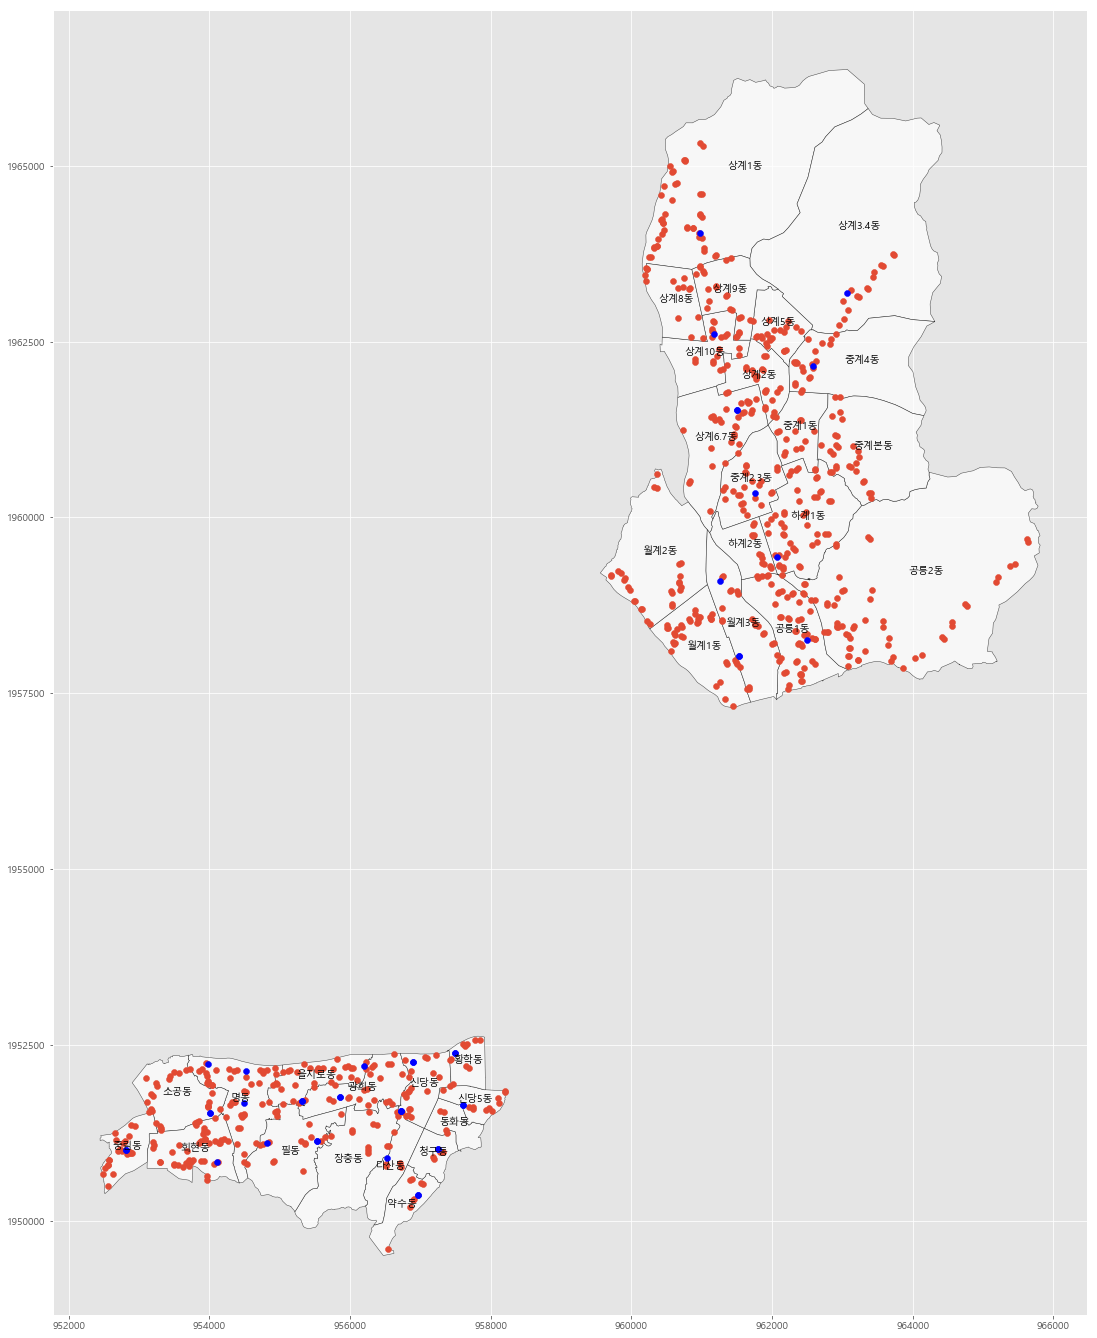

In [34]:
fig, ax = plt.subplots(figsize=(32,24))
geo_df.loc[geo_df.SIDO_NM=='서울특별시'].plot(ax=ax, color='white', alpha=0.7, edgecolor='k')
bus_station_gdf.plot(ax=ax)
subway_station.plot(ax=ax, color='b')

for idx, row in geo_df.loc[geo_df.SIDO_NM=='서울특별시'].iterrows():
    ax.annotate(row['HDONG_NM'], (row['center'].x,row['center'].y), fontsize=10, ha='center')

In [86]:
subway_station

,전철역,전철역_,호선,외부코,사이버,X좌표,Y좌표,X,Y,geometry,HDONG_NM
0,None,None,5,None,None,491842,1127227,126.963672,37.559973,POINT (952820.959 1951008.922),중림동
1,None,None,2,None,None,491842,1127227,126.963672,37.559973,POINT (952820.959 1951008.922),중림동
2,None,None,2,None,None,494587,1128532,126.977108,37.564718,POINT (954010.561 1951528.691),소공동
3,None,None,1,None,None,494587,1128532,126.977108,37.564718,POINT (954010.561 1951528.691),소공동
4,None,None,1,None,None,496085,1129940,126.982923,37.570161,POINT (954527.429 1952129.736),명동
5,None,None,1,None,None,500162,1130132,127.001849,37.570926,POINT (956199.212 1952205.606),을지로동
6,None,None,1,None,None,502155,1130180,127.009745,37.571420,POINT (956896.777 1952256.757),신당동
7,None,None,4,None,None,502155,1130180,127.009745,37.571420,POINT (956896.777 1952256.757),신당동
8,None,None,6,None,None,503422,1130557,127.016429,37.572627,POINT (957487.711 1952387.618),황학동
9,None,None,1,None,None,503422,1130557,127.016429,37.572627,POINT (957487.711 1952387.618),황학동


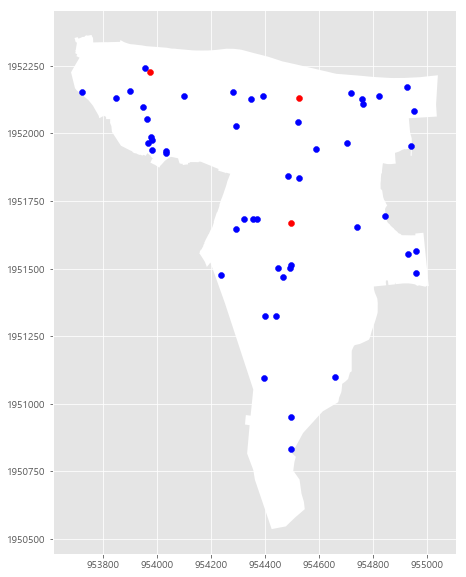

In [514]:
fig, ax = plt.subplots(figsize=(12,10))

geo_df.loc[geo_df.HDONG_NM=='명동'].plot(ax=ax, color='white')
bus_station_gdf.loc[bus_station_gdf.HDONG_NM=='명동'].plot(ax=ax, color='blue')
subway_station.loc[subway_station.HDONG_NM=='명동'].plot(ax=ax, color='r')

#### 교통편의성

In [41]:
HDONG_NM=geo_df.loc[geo_df.SIDO_NM=='서울특별시'][['HDONG_NM']].reset_index(drop=True)

HDONG_NM['subway_station_num']=HDONG_NM.HDONG_NM.map(subway_station_num_by_HDONG).fillna(0)
HDONG_NM['bus_station_num']=HDONG_NM.HDONG_NM.map(bus_station_num_by_dong).fillna(0)
HDONG_NM['bus_route_num'] = HDONG_NM.HDONG_NM.map(route_num_by_HDONG).fillna(0)
HDONG_NM['subway_route_num'] = HDONG_NM.HDONG_NM.map(subway_route_num_by_HDONG).fillna(0)

In [42]:
HDONG_NM

,HDONG_NM,subway_station_num,bus_station_num,bus_route_num,subway_route_num
0,공릉1동,1.0,49,16,1.0
1,공릉2동,0.0,59,11,0.0
2,상계10동,1.0,19,7,1.0
3,상계1동,1.0,45,6,1.0
4,상계2동,0.0,24,8,0.0
5,상계3.4동,1.0,15,3,1.0
6,상계5동,0.0,21,4,0.0
7,상계6.7동,2.0,30,13,2.0
8,상계8동,0.0,13,5,0.0
9,상계9동,0.0,24,6,0.0


In [111]:
np.log((HDONG_NM.merge(geo_df[['HDONG_NM','AREA']]).subway_route_num*20+HDONG_NM.merge(geo_df[['HDONG_NM','AREA']]).bus_route_num)/(HDONG_NM.merge(geo_df[['HDONG_NM','AREA']]).AREA)*100000)

0     1.078384
1    -1.851566
2     1.200686
3    -0.691703
4     0.247857
5    -0.916218
6    -0.349851
7     1.306829
8    -0.297285
9    -0.228178
10    0.108590
11   -1.599508
12    1.515180
13   -0.228032
14    1.115766
15    0.459772
16   -1.317787
17    0.742961
18    0.330633
19    2.022258
20    1.439808
21    0.603265
22    2.327291
23    2.140847
24    2.661290
25    2.940200
26    2.194796
27    2.591782
28   -0.781276
29    2.377786
30    2.569427
31    1.366169
32    2.761335
33    1.940592
dtype: float64

In [43]:
HDONG_conv_index = HDONG_NM.merge(geo_df[['HDONG_NM','AREA']])

In [47]:
HDONG_conv_index.head(10)

,HDONG_NM,subway_station_num,bus_station_num,bus_route_num,subway_route_num,AREA
0,공릉1동,1.0,49,16,1.0,1224521.56
1,공릉2동,0.0,59,11,0.0,7006762.92
2,상계10동,1.0,19,7,1.0,812666.82
3,상계1동,1.0,45,6,1.0,5192495.41
4,상계2동,0.0,24,8,0.0,624377.16
5,상계3.4동,1.0,15,3,1.0,5749582.10
6,상계5동,0.0,21,4,0.0,567542.62
7,상계6.7동,2.0,30,13,2.0,1434588.18
8,상계8동,0.0,13,5,0.0,673099.72
9,상계9동,0.0,24,6,0.0,753785.09


$CONV\ INDEX = {100000 \cdot (\#subway\_route \cdot 15 + \#bus\_route) \over AREA}  $

In [116]:
HDONG_conv_index['conv_index'] = np.log((HDONG_NM.merge(geo_df[['HDONG_NM','AREA']]).subway_route_num*15+HDONG_NM.merge(geo_df[['HDONG_NM','AREA']]).bus_route_num)/(HDONG_NM.merge(geo_df[['HDONG_NM','AREA']]).AREA)*100000)

In [118]:
HDONG_conv_index.to_csv("HDONG_conv_index.csv", index=False, encoding='utf-8')

In [ ]:
HDONG_NM.merge(geo_df[['HDONG_NM','AREA']]).eval('conv=(subway_route_num*20+bus_route_num)/AREA*100000').sort_values(by='conv', ascending=False)

In [37]:
conv_index=HDONG_NM.merge(geo_df[['HDONG_NM','AREA']]).eval('conv=(subway_route_num*20+bus_route_num)/AREA*100000').sort_values(by='conv', ascending=False)

In [40]:
conv_index = conv_index.reset_index(drop=True)

In [120]:
HDONG_conv_index

,HDONG_NM,subway_station_num,bus_station_num,bus_route_num,subway_route_num,AREA,conv_index
0,공릉1동,1.0,49,16,1.0,1224521.56,0.928852
1,공릉2동,0.0,59,11,0.0,7006762.92,-1.851566
2,상계10동,1.0,19,7,1.0,812666.82,0.995891
3,상계1동,1.0,45,6,1.0,5192495.41,-0.905277
4,상계2동,0.0,24,8,0.0,624377.16,0.247857
5,상계3.4동,1.0,15,3,1.0,5749582.10,-1.161341
6,상계5동,0.0,21,4,0.0,567542.62,-0.349851
7,상계6.7동,2.0,30,13,2.0,1434588.18,1.097737
8,상계8동,0.0,13,5,0.0,673099.72,-0.297285
9,상계9동,0.0,24,6,0.0,753785.09,-0.228178


In [42]:
# conv_index.to_csv("conv_index.csv", index=False, encoding='utf-8')

In [250]:
HDONG_NM.eval('conv=subway_route_num*20+bus_route_num').sort_values(by='conv', ascending=False)

,HDONG_NM,subway_station_num,bus_station_num,bus_route_num,subway_route_num,conv
22,명동,3.0,49,48,3.0,108.0
25,신당동,5.0,21,23,2.0,63.0
27,을지로동,3.0,32,20,2.0,60.0
33,회현동,1.0,42,39,1.0,59.0
23,소공동,2.0,28,36,1.0,56.0
12,월계3동,3.0,23,12,2.0,52.0
31,필동,3.0,16,6,2.0,46.0
19,광희동,2.0,22,16,1.0,36.0
0,공릉1동,1.0,49,16,1.0,36.0
7,상계6.7동,2.0,30,13,1.0,33.0


In [196]:
HDONG_NM.merge(geo_df[['HDONG_NM','AREA']]).corr()

,subway_station_num,bus_station_num,bus_route_num,AREA
subway_station_num,1.000000,-0.011695,0.450814,-0.205983
bus_station_num,-0.011695,1.000000,0.514944,0.486250
bus_route_num,0.450814,0.514944,1.000000,-0.117301
AREA,-0.205983,0.486250,-0.117301,1.000000


In [197]:
HDONG_NM.merge(geo_df[['HDONG_NM','AREA']])

,HDONG_NM,subway_station_num,bus_station_num,bus_route_num,AREA
0,공릉1동,1.0,49,16,1224521.56
1,공릉2동,0.0,59,11,7006762.92
2,상계10동,1.0,19,7,812666.82
3,상계1동,1.0,45,6,5192495.41
4,상계2동,0.0,24,8,624377.16
5,상계3.4동,1.0,15,3,5749582.10
6,상계5동,0.0,21,4,567542.62
7,상계6.7동,2.0,30,13,1434588.18
8,상계8동,0.0,13,5,673099.72
9,상계9동,0.0,24,6,753785.09


In [80]:
HDONG_NM

,HDONG_NM,subway_station_num,bus_station_num,bus_route_num,subway_route_num
0,공릉1동,1.0,49,16,1.0
1,공릉2동,0.0,59,11,0.0
2,상계10동,1.0,19,7,1.0
3,상계1동,1.0,45,6,1.0
4,상계2동,0.0,24,8,0.0
5,상계3.4동,1.0,15,3,1.0
6,상계5동,0.0,21,4,0.0
7,상계6.7동,2.0,30,13,1.0
8,상계8동,0.0,13,5,0.0
9,상계9동,0.0,24,6,0.0


In [66]:
geo_df_seoul = geo_df.loc[geo_df.SIDO_NM=='서울특별시'].reset_index(drop=True)

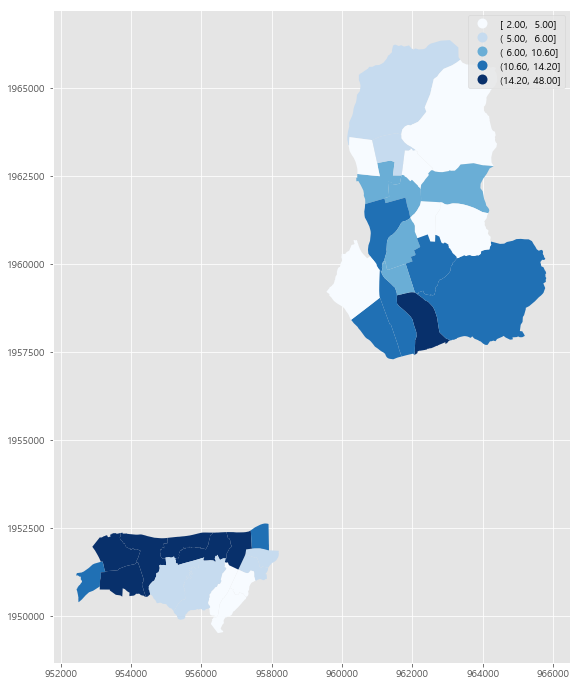

In [74]:
geo_df_seoul.merge(HDONG_NM).plot(figsize=(10,12), column='bus_route_num', cmap='Blues', legend=True, scheme='quantiles')

#### 정류장별 노선갯수 

In [212]:
bus_route.버스정류장ARS번호.nunique()

16070

In [56]:
bus_station_info

,표준ID,ARS-ID,정류장명,X좌표,Y좌표,point,HDONG_NM,geometry
0,100000001,1001,종로2가사거리,126.987750,37.569765,POINT (954953.4472414826 1952083.487207221),명동,POINT (954953.447 1952083.487)
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,POINT (954940.6524992425 1951951.987410024),명동,POINT (954940.652 1951951.987)
5,101000305,1006,서대문역사거리,126.966893,37.566137,POINT (953109.3102266531 1951691.178555617),소공동,POINT (953109.310 1951691.179)
6,100000380,1007,서울역사박물관.경희궁앞,126.970380,37.569135,POINT (953419.1299199655 1952022.058152919),소공동,POINT (953419.130 1952022.058)
7,100000379,1008,서울역사박물관.경희궁앞,126.970609,37.569412,POINT (953439.5256339005 1952052.67656241),소공동,POINT (953439.526 1952052.677)
...,...,...,...,...,...,...,...,...
5648,113900028,14525,돼지슈퍼,126.961485,37.556922,POINT (952625.8284630371 1950671.483988083),중림동,POINT (952625.828 1950671.484)
5659,101900026,14540,아현실버복지관,126.960216,37.557641,POINT (952514.2074581792 1950751.968128541),중림동,POINT (952514.207 1950751.968)
5703,113900286,14589,서부수도사업소,126.959873,37.556805,POINT (952483.3989845278 1950659.342648931),중림동,POINT (952483.399 1950659.343)
5713,113900217,14599,만물사부동산,126.960737,37.555348,POINT (952558.820636402 1950497.281852798),중림동,POINT (952558.821 1950497.282)


In [45]:
route_num_by_station=bus_route.groupby(['버스정류장ARS번호'])['노선번호'].apply(lambda x: x.nunique()).reset_index(name='노선수')

In [172]:
route_num_by_station.loc[route_num_by_station.버스정류장ARS번호!='~']['버스정류장ARS번호'].apply(lambda x : str(x)[1:] if x.startswith('0') else str(x))

0        1001
1        1002
2        1003
3        1004
4        1005
         ... 
16065    9947
16066    9948
16067    9949
16068    9950
16069    9994
Name: 버스정류장ARS번호, Length: 16070, dtype: object

In [174]:
start_end_point=bus_route.loc[bus_route.버스정류장ARS번호=='~'].index

In [175]:
bus_route=bus_route.drop(start_end_point)

In [176]:
bus_route.reset_index(drop=True, inplace=True)

In [173]:
bus_route['사용일자']=pd.to_datetime(bus_route['사용일자'], format='%Y%m%d')

In [177]:
station_HDONG=bus_station_info[['ARS-ID','HDONG_NM']].set_index('ARS-ID').to_dict().get('HDONG_NM')

In [141]:
# bus_route['버스정류장ARS번호'].apply(lambda x : int(x[1:]) if x.startswith('0') else int(x)).map(station_HDONG).dropna().to_dict()

In [178]:
bus_route['HDONG_NM'] = None

In [179]:
bus_route['HDONG_NM'] = bus_route.index.map(bus_route['버스정류장ARS번호'].apply(lambda x : int(x[1:]) if x.startswith('0') else int(x)).map(station_HDONG).dropna().to_dict())

In [180]:
bus_route_sub = bus_route.dropna().reset_index(drop=True)

In [217]:
bus_route_sub.groupby(['HDONG_NM','버스정류장ARS번호'])['노선번호'].unique().reset_index()

,HDONG_NM,버스정류장ARS번호,노선번호
0,공릉1동,11101,"[146, 105, 1221, N13, N61]"
1,공릉1동,11102,"[146, 105, N13, 1221, N61]"
2,공릉1동,11109,[1135]
3,공릉1동,11110,[1135]
4,공릉1동,11111,"[노원03, 노원04, 노원13, 1135]"
...,...,...,...
916,회현동,2506,"[종로11, 종로09]"
917,회현동,2513,[서대문06]
918,회현동,2514,[서대문06]
919,회현동,2516,[서대문06]


In [188]:
# 행정동별 가장 많은 노선을 가지고 있는 버스정류장의 노선 수

bus_route_sub.groupby(['HDONG_NM','버스정류장ARS번호'])['노선번호'].nunique().reset_index().groupby(['HDONG_NM'])['노선번호'].max().reset_index().sort_values(by='노선번호', ascending=False)

,HDONG_NM,노선번호
5,명동,25
16,신당동,25
33,회현동,24
32,황학동,24
21,을지로동,23
14,소공동,20
2,광희동,17
27,중림동,13
30,하계1동,10
11,상계6.7동,10


#### 버스정류장별 승하차 인원, 지하철 승하차 인원

In [156]:
subway_use=pd.read_csv(os.path.join(csv_file_path,'CARD_SUBWAY_MONTH_202007.csv'))

In [82]:
bus_route.groupby(['사용일자','버스정류장ARS번호'])['하차총승객수'].sum().reset_index()

,사용일자,버스정류장ARS번호,하차총승객수
0,2020-01-01,01001,285
1,2020-01-01,01002,700
2,2020-01-01,01003,1755
3,2020-01-01,01004,309
4,2020-01-01,01005,1897
...,...,...,...
2614975,2020-07-31,68271,28
2614976,2020-07-31,68290,4
2614977,2020-07-31,68351,71
2614978,2020-07-31,68352,143


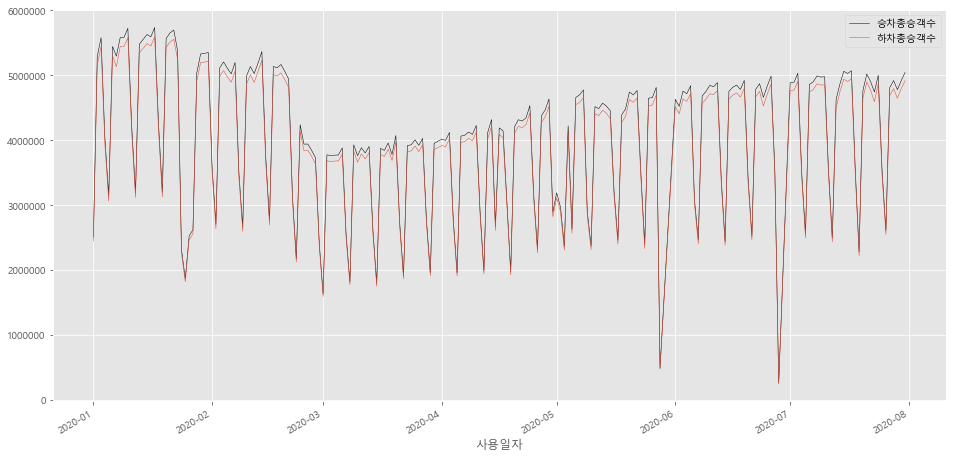

In [93]:
fig, ax = plt.subplots(figsize=(16,8))
bus_route.groupby(['사용일자'])['승차총승객수'].sum().reset_index().set_index('사용일자').plot(ax=ax, linewidth=.5, color='k')
bus_route.groupby(['사용일자'])['하차총승객수'].sum().reset_index().set_index('사용일자').plot(ax=ax, linewidth=.5)

In [181]:
bus_route['year'] = bus_route['사용일자'].dt.year.values
bus_route['month'] = bus_route['사용일자'].dt.month.values
bus_route['weekofyear'] = bus_route['사용일자'].dt.weekofyear.values
bus_route['dayofweek'] = bus_route['사용일자'].dt.dayofweek.values

bus_route['weekday'] = np.where(bus_route.dayofweek<5,'평일','주말')

In [206]:
bus_route_sub.loc[bus_route_sub.HDONG_NM=='명동'].groupby(['사용일자'])['승차총승객수'].sum().reset_index()

,사용일자,승차총승객수
0,2020-01-01,36388
1,2020-01-02,68527
2,2020-01-03,73255
3,2020-01-04,50403
4,2020-01-05,40762
...,...,...
202,2020-07-27,56458
203,2020-07-28,59693
204,2020-07-29,56838
205,2020-07-30,62038


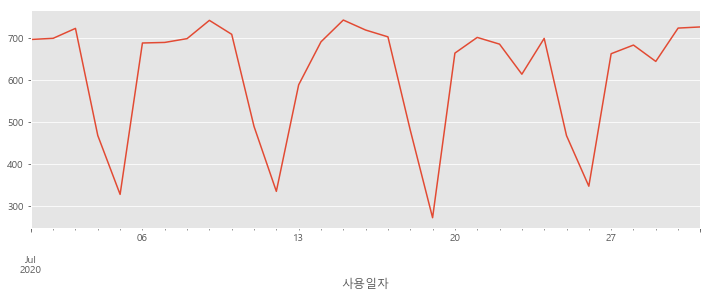

In [186]:
bus_route_sub.loc[(bus_route_sub.HDONG_NM=='명동') & (bus_route_sub.사용일자.dt.month==7)].groupby(['사용일자','노선번호'])['승차총승객수'].sum().reset_index().pivot('사용일자','노선번호','승차총승객수').mean(axis=1).plot(figsize=(12,4))

In [187]:
bus_route_sub.loc[(bus_route_sub.HDONG_NM=='명동') & (bus_route_sub.사용일자.dt.month==7)].groupby(['사용일자','노선번호'])['승차총승객수'].sum().reset_index().pivot('사용일자','노선번호','승차총승객수').mean(axis=1).mean()

615.6964035866971

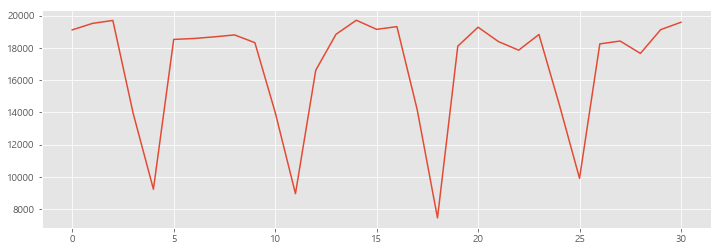

In [191]:
subway_use.loc[subway_use.역ID=='명동'].reset_index(drop=True).승차총승객수.plot(figsize=(12,4))

In [193]:
subway_use.loc[subway_use.역ID=='명동'].reset_index(drop=True).승차총승객수.mean()

16851.225806451614

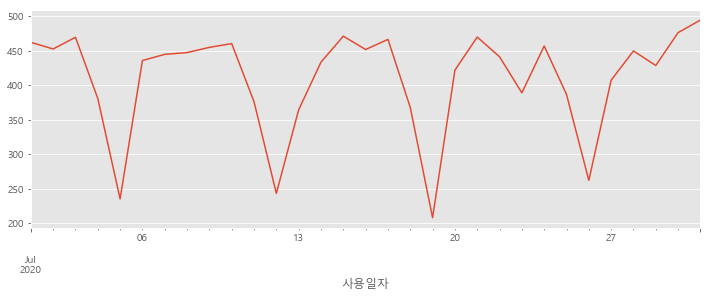

In [194]:
bus_route_sub.loc[(bus_route_sub.HDONG_NM=='신당동') & (bus_route_sub.사용일자.dt.month==7)].groupby(['사용일자','노선번호'])['승차총승객수'].sum().reset_index().pivot('사용일자','노선번호','승차총승객수').mean(axis=1).plot(figsize=(12,4))

In [195]:
bus_route_sub.loc[(bus_route_sub.HDONG_NM=='신당동') & (bus_route_sub.사용일자.dt.month==7)].groupby(['사용일자','노선번호'])['승차총승객수'].sum().reset_index().pivot('사용일자','노선번호','승차총승객수').mean(axis=1).mean()

410.0667325922389

In [199]:
subway_use.loc[subway_use.역ID=='동대문역사문화공원(DDP)'].reset_index(drop=True).groupby(['역ID','사용일자'])['승차총승객수'].sum().mean()

27440.16129032258

In [167]:
subway_use.groupby('노선명')['역ID'].apply(lambda x : x.unique())[3]

array(['수유(강북구청)', '미아(서울사이버대학)', '미아사거리', '길음', '성신여대입구(돈암)',
       '한성대입구(삼선교)', '혜화', '동대문', '동대문역사문화공원(DDP)', '충무로', '명동',
       '회현(남대문시장)', '서울역', '숙대입구(갈월)', '삼각지', '신용산', '이촌(국립중앙박물관)',
       '동작(현충원)', '총신대입구(이수)', '사당', '남태령', '당고개', '상계', '노원', '창동', '쌍문'],
      dtype=object)

In [169]:
subway_use.loc[subway_use.역ID=='동대문역사문화공원(DDP)'].groupby(['역ID','사용일자'])['승차총승객수'].sum()

역ID             사용일자    
동대문역사문화공원(DDP)  20200701    30969
                20200702    31076
                20200703    31938
                20200704    19867
                20200705    15575
                20200706    30534
                20200707    30535
                20200708    30808
                20200709    30710
                20200710    31052
                20200711    20115
                20200712    16198
                20200713    28766
                20200714    30411
                20200715    31843
                20200716    31321
                20200717    32195
                20200718    19531
                20200719    13480
                20200720    29489
                20200721    31205
                20200722    30231
                20200723    29766
                20200724    31957
                20200725    20178
                20200726    15970
                20200727    30320
                20200728    30714
                2020072

In [54]:
geo_df.iloc[0,:].geometry.distance(geo_df.iloc[5,:].geometry)

4107.124427530469

In [57]:
geo_df

,STD_YYYY,HDONG_CD,HDONG_NM,SIDO_CD,SIDO_NM,SGNG_CD,SGNG_NM,AREA,LENGTH,X_COORD,Y_COORD,geometry,center
0,2020,2726067000,고산1동,27,대구광역시,27260,수성구,8881312.38,17757.54,128.69963062806,35.8117467030855,"POLYGON ((1110163.050 1760631.159, 1110159.980...",POINT (1108378.584 1757917.496)
1,2020,2726068000,고산2동,27,대구광역시,27260,수성구,24523329.28,25763.81,128.677147073408,35.838758403345,"POLYGON ((1108750.463 1760472.331, 1108750.254...",POINT (1106311.447 1760888.832)
2,2020,2726069000,고산3동,27,대구광역시,27260,수성구,5315712.45,11274.68,128.714043831276,35.8490479398919,"POLYGON ((1110796.393 1761790.272, 1110768.063...",POINT (1109629.645 1762071.098)
3,2020,2726064000,두산동,27,대구광역시,27260,수성구,1966650.15,7777.10,128.620832776346,35.8285656536299,"POLYGON ((1101901.259 1759682.396, 1101895.505...",POINT (1101238.235 1759698.768)
4,2020,2726055000,만촌1동,27,대구광역시,27260,수성구,2830625.94,8778.85,128.649513200936,35.8706818518603,"POLYGON ((1104959.292 1764030.763, 1104950.336...",POINT (1103773.981 1764400.357)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2020,1114068000,중림동,11,서울특별시,11140,중구,482329.92,3500.86,126.966042028799,37.5573555328314,"POLYGON ((953267.837 1951244.338, 953260.413 1...",POINT (952839.355 1951023.475)
65,2020,1114064500,청구동,11,서울특별시,11140,중구,336949.37,2696.70,127.015201201613,37.5568631855271,"POLYGON ((957542.926 1950997.368, 957519.101 1...",POINT (957180.979 1950945.326)
66,2020,1114057000,필동,11,서울특별시,11140,중구,1173378.79,6575.62,126.992276757613,37.5568174037835,"POLYGON ((955947.962 1951617.335, 955934.934 1...",POINT (955156.170 1950950.928)
67,2020,1114067000,황학동,11,서울특별시,11140,중구,328678.23,2381.97,127.020846207973,37.5685359648242,"POLYGON ((957926.315 1951862.361, 957912.004 1...",POINT (957686.173 1952237.802)


In [59]:
geo_seoul=geo_df.query('SIDO_NM==\'서울특별시\'').reset_index(drop=True)

In [71]:
geo_seoul.iloc[0,-1].distance(geo_seoul.iloc[10,-1])

1274.057552790074

In [61]:
distances = []
for i in range(geo_seoul.shape[0]):
    distance = []
    for j in range(geo_seoul.shape[0]):
        if i == j:
            distance.append(0)
        else:
            distance.append(geo_seoul.iloc[i,-2].distance(geo_seoul.iloc[j,-2]))
    distances.append(distance) 

In [75]:
distances_center = []
for i in range(geo_seoul.shape[0]):
    distance = []
    for j in range(geo_seoul.shape[0]):
        if i == j:
            distance.append(0)
        else:
            distance.append(geo_seoul.iloc[i,-1].distance(geo_seoul.iloc[j,-1]))
    distances_center.append(distance) 

In [68]:
distance_dong_to_dong = pd.DataFrame(distances, columns=geo_seoul.HDONG_NM.tolist(), index=geo_seoul.HDONG_NM.tolist())

In [76]:
distance_center_dong_to_dong = pd.DataFrame(distances_center, columns=geo_seoul.HDONG_NM.tolist(), index=geo_seoul.HDONG_NM.tolist())

In [69]:
# distance_dong_to_dong.to_csv("distance_dong_to_dong.csv", encoding='utf-8')
# distance_center_dong_to_dong.to_csv("distance_center_dong_to_dong.csv", encoding='utf-8')

In [79]:
distance_dong_to_dong

,공릉1동,공릉2동,상계10동,상계1동,상계2동,상계3.4동,상계5동,상계6.7동,상계8동,상계9동,...,신당5동,신당동,약수동,을지로동,장충동,중림동,청구동,필동,황학동,회현동
공릉1동,0.000000,0.000000,2743.849531,4457.066765,2112.981215,3486.363385,2943.612081,806.301925,3406.956064,3330.702948,...,6779.540427,6835.471208,8360.008018,7656.800134,7896.279340,10646.688926,7669.332519,8434.553942,6356.948152,9834.463588
공릉2동,0.000000,0.000000,2604.157398,3854.455912,1749.404602,2144.820766,2222.250279,1131.488058,3201.428549,2833.845327,...,7682.854737,7785.510157,9267.379947,8610.170782,8846.054487,11590.676565,8584.481947,9387.644809,7299.141295,10784.497846
상계10동,2743.849531,2604.157398,0.000000,670.269282,0.000000,608.032280,18.752190,0.000000,0.000000,0.000000,...,10157.652027,9837.461856,11564.290015,10299.918816,10817.468994,12610.044246,10908.809238,11133.746022,9500.239352,12059.087685
상계1동,4457.066765,3854.455912,670.269282,0.000000,1142.428745,0.000000,457.043831,1696.030858,0.000000,0.000000,...,11700.159730,11305.475818,13024.723145,11673.933927,12226.200934,13747.031676,12406.734831,12502.137848,11004.132785,13282.486949
상계2동,2112.981215,1749.404602,0.000000,1142.428745,0.000000,586.449611,0.000000,0.000000,280.486353,0.000000,...,10176.711501,9983.225375,11679.525917,10570.195379,11009.234709,12984.998349,10989.586536,11400.375968,9591.555998,12403.643811
상계3.4동,3486.363385,2144.820766,608.032280,0.000000,586.449611,0.000000,0.000000,1081.101470,819.757451,0.000000,...,11660.988617,11468.013153,13165.548056,12044.647248,12492.099436,14541.597116,12475.539449,12875.971966,11077.562886,13931.136903
상계5동,2943.612081,2222.250279,18.752190,457.043831,0.000000,0.000000,0.000000,483.686562,617.136116,0.000000,...,11051.734903,10852.426468,12552.489702,11427.234543,11875.553089,13899.662098,11862.998108,12258.555096,10463.948548,13317.135485
상계6.7동,806.301925,1131.488058,0.000000,1696.030858,0.000000,1081.101470,483.686562,0.000000,645.931161,638.537668,...,8449.826603,8241.739513,9942.692767,8832.439893,9267.103127,11429.188565,9253.976517,9661.637214,7853.595126,10771.704479
상계8동,3406.956064,3201.428549,0.000000,0.000000,280.486353,819.757451,617.136116,645.931161,0.000000,0.000000,...,10946.149590,10586.642786,12310.975457,11000.152977,11536.491657,13189.000865,11675.835895,11831.952698,10268.084039,12682.474111
상계9동,3330.702948,2833.845327,0.000000,0.000000,0.000000,0.000000,0.000000,638.537668,0.000000,0.000000,...,11155.310384,10879.733096,12605.967076,11379.569580,11878.119809,13736.901693,11930.880732,12213.627134,10523.286112,13173.954393


In [78]:
distance_center_dong_to_dong

,공릉1동,공릉2동,상계10동,상계1동,상계2동,상계3.4동,상계5동,상계6.7동,상계8동,상계9동,...,신당5동,신당동,약수동,을지로동,장충동,중림동,청구동,필동,황학동,회현동
공릉1동,0.000000,2080.149788,4132.731136,6617.239000,3645.012466,5806.691958,4370.380271,2932.326330,4966.647739,4918.282883,...,8066.614076,8305.540383,9874.189262,9271.080919,9824.962106,11970.470258,9016.481448,10294.387274,7671.420329,11248.822990
공릉2동,2080.149788,0.000000,4432.341761,6312.714195,3667.842044,4996.450294,4120.550075,3549.023277,5252.445705,4889.798751,...,9881.215004,10193.767049,11680.686531,11249.201786,11718.971953,13993.078405,10832.778884,12237.429416,9531.329294,13245.452415
상계10동,4132.731136,4432.341761,0.000000,2699.685619,836.427274,2827.894751,1126.987124,1228.857377,848.416032,965.209609,...,11123.192186,11135.193187,12858.808790,11677.859206,12549.122262,13965.223007,12016.142164,12806.738484,10630.037511,13447.338455
상계1동,6617.239000,6312.714195,2699.685619,0.000000,2975.185140,1839.892727,2268.130410,3881.622164,2135.081367,1755.996026,...,13814.504089,13808.496694,15539.636962,14291.041680,15202.534148,16469.808699,14700.896538,15427.314502,13316.577324,16003.435978
상계2동,3645.012466,3667.842044,836.427274,2975.185140,0.000000,2548.031990,800.143139,1084.865650,1593.885993,1291.323291,...,11067.134896,11136.048962,12833.835177,11781.644080,12586.844081,14175.018618,11981.671427,12895.897679,10594.442239,13610.617767
상계3.4동,5806.691958,4996.450294,2827.894751,1839.892727,2548.031990,0.000000,1781.581748,3632.829898,2806.944550,2038.800249,...,13565.434445,13660.343894,15344.649886,14328.716532,15121.678785,16713.869578,14489.275866,15441.176915,13104.230862,16157.202380
상계5동,4370.380271,4120.550075,1126.987124,2268.130410,800.143139,1781.581748,0.000000,1870.006153,1491.167316,833.110299,...,11867.085442,11933.122361,13632.846565,12565.027654,13380.592310,14933.167139,12781.029422,13682.300319,11393.693403,14381.544333
상계6.7동,2932.326330,3549.023277,1228.857377,3881.622164,1084.865650,3632.829898,1870.006153,0.000000,2040.347932,2125.813874,...,10014.641702,10067.442066,11772.713669,10697.914471,11511.235045,13093.805430,10922.903147,11813.473190,9535.213355,12526.074366
상계8동,4966.647739,5252.445705,848.416032,2135.081367,1593.885993,2806.944550,1491.167316,2040.347932,0.000000,786.270470,...,11726.635324,11697.745964,13434.967746,12157.553288,13078.951366,14343.813044,12601.538873,13294.616455,11220.871988,13869.841699
상계9동,4918.282883,4889.798751,965.209609,1755.996026,1291.323291,2038.800249,833.110299,2125.813874,786.270470,0.000000,...,12085.404650,12100.314824,13823.302946,12637.540888,13513.804406,14902.982162,12980.070427,13767.741419,11593.683739,14396.582529


___

#### 교통편의성.v2

In [114]:
distance_file=[pd.read_csv(os.path.join(csv_file_path,file), index_col=[0]) for file in os.listdir(csv_file_path) if file.startswith('distance')]

In [115]:
adjacent_dist = distance_file[1]

In [116]:
adjacent_dist

,공릉1동,공릉2동,상계10동,상계1동,상계2동,상계3.4동,상계5동,상계6.7동,상계8동,상계9동,...,신당5동,신당동,약수동,을지로동,장충동,중림동,청구동,필동,황학동,회현동
공릉1동,0.000000,0.000000,2743.849531,4457.066765,2112.981215,3486.363385,2943.612081,806.301925,3406.956064,3330.702948,...,6779.540427,6835.471208,8360.008018,7656.800134,7896.279340,10646.688926,7669.332519,8434.553942,6356.948152,9834.463588
공릉2동,0.000000,0.000000,2604.157398,3854.455912,1749.404602,2144.820766,2222.250279,1131.488058,3201.428549,2833.845327,...,7682.854737,7785.510157,9267.379947,8610.170782,8846.054487,11590.676565,8584.481947,9387.644809,7299.141295,10784.497846
상계10동,2743.849531,2604.157398,0.000000,670.269282,0.000000,608.032280,18.752190,0.000000,0.000000,0.000000,...,10157.652027,9837.461856,11564.290015,10299.918816,10817.468994,12610.044246,10908.809238,11133.746022,9500.239352,12059.087685
상계1동,4457.066765,3854.455912,670.269282,0.000000,1142.428745,0.000000,457.043831,1696.030858,0.000000,0.000000,...,11700.159730,11305.475818,13024.723145,11673.933927,12226.200934,13747.031676,12406.734831,12502.137848,11004.132785,13282.486949
상계2동,2112.981215,1749.404602,0.000000,1142.428745,0.000000,586.449611,0.000000,0.000000,280.486353,0.000000,...,10176.711501,9983.225375,11679.525917,10570.195379,11009.234709,12984.998349,10989.586536,11400.375968,9591.555998,12403.643811
상계3.4동,3486.363385,2144.820766,608.032280,0.000000,586.449611,0.000000,0.000000,1081.101470,819.757451,0.000000,...,11660.988617,11468.013153,13165.548056,12044.647248,12492.099436,14541.597116,12475.539449,12875.971966,11077.562886,13931.136903
상계5동,2943.612081,2222.250279,18.752190,457.043831,0.000000,0.000000,0.000000,483.686562,617.136116,0.000000,...,11051.734903,10852.426468,12552.489702,11427.234543,11875.553089,13899.662098,11862.998108,12258.555096,10463.948548,13317.135485
상계6.7동,806.301925,1131.488058,0.000000,1696.030858,0.000000,1081.101470,483.686562,0.000000,645.931161,638.537668,...,8449.826603,8241.739513,9942.692767,8832.439893,9267.103127,11429.188565,9253.976517,9661.637214,7853.595126,10771.704479
상계8동,3406.956064,3201.428549,0.000000,0.000000,280.486353,819.757451,617.136116,645.931161,0.000000,0.000000,...,10946.149590,10586.642786,12310.975457,11000.152977,11536.491657,13189.000865,11675.835895,11831.952698,10268.084039,12682.474111
상계9동,3330.702948,2833.845327,0.000000,0.000000,0.000000,0.000000,0.000000,638.537668,0.000000,0.000000,...,11155.310384,10879.733096,12605.967076,11379.569580,11878.119809,13736.901693,11930.880732,12213.627134,10523.286112,13173.954393


In [117]:
HDONGS=adjacent_dist.columns.tolist()
adjacent_dong_dict = {}
    
for i,dong in tqdm(enumerate(HDONGS), desc='Finding Adjacent Dongs'):
    adjacent_dong_dict[dong] = list(adjacent_dist.loc[adjacent_dist[dong]==0,HDONGS[i]].drop(dong).index)

Finding Adjacent Dongs: 34it [00:00, 1418.71it/s]


In [152]:
(bus_route_num_df.loc[list(adjacent_dong_dict.items())[0][0], list(adjacent_dong_dict.items())[0][1]]).mean()

8.25

In [153]:
mean_bus_route_num_to_adj_dongs = {}
for dong, adj_dongs in adjacent_dong_dict.items():
    mean_bus_route_num_to_adj_dongs[dong]=bus_route_num_df.loc[dong, adj_dongs].mean()

In [154]:
mean_bus_route_num_to_adj_dongs

{'공릉1동': 8.25,
 '공릉2동': 3.75,
 '광희동': 8.25,
 '다산동': 1.4,
 '동화동': 2.75,
 '명동': 22.0,
 '상계10동': 3.75,
 '상계1동': 3.0,
 '상계2동': 4.0,
 '상계3.4동': 1.25,
 '상계5동': 2.0,
 '상계6.7동': 4.285714285714286,
 '상계8동': 3.0,
 '상계9동': 3.1666666666666665,
 '소공동': 21.666666666666668,
 '신당5동': 1.6666666666666667,
 '신당동': 6.0,
 '약수동': 2.5,
 '월계1동': 6.0,
 '월계2동': 2.3333333333333335,
 '월계3동': 5.8,
 '을지로동': 10.333333333333334,
 '장충동': 3.25,
 '중계1동': 2.8333333333333335,
 '중계2.3동': 4.2,
 '중계4동': 2.4,
 '중계본동': 2.75,
 '중림동': 7.5,
 '청구동': 2.5,
 '필동': 3.25,
 '하계1동': 5.5,
 '하계2동': 4.5,
 '황학동': 5.5,
 '회현동': 23.0}